In [23]:
#cargamos la librería en el sistema
import pandas as pd
import seaborn as sns
import numpy as np

Los datos provienen de un esfuerzo de la Universidad de Cleveland: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [3]:
#leemos el dataset desde un sitio web
df = pd.read_csv("https://raw.githubusercontent.com/CII-IA/training_data/main/heart.csv")

Resolver con machine learning para detectar covid evaluando audios de como respiran las personas con o sin covid

In [4]:
#dimensión de la matriz: 303 filas, 14 columnas
df.shape

(303, 14)

In [5]:
#muestra los primeros 5 registros del dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Exploración de los datos.

In [14]:
# promedio de edades. media de las columna age
df['age'].mean()

54.366336633663366

In [15]:
#devuelve los encabezados, los nombres de las columnas
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [16]:
#dimensión del dataframe
df.shape

(303, 14)

In [20]:
# brinda un resumen estadístico. no cuenta los valores vacíos
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [21]:
#brinda información computacional, tipos de datos, número de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:>

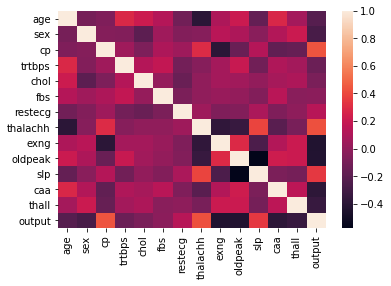

In [24]:
#cuando trabajamos problemas de machine learnign hay que analizar la correlación entre las variables
corr = df.corr()
sns.heatmap(corr)

In [26]:
#matriz de correlación
corr

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Preparación de los datos.

Completar datos faltantes, quitar columnas, cambiar tipos de datos, normalización

En ésta etapa podemos reacomodar los datos para tener un conjunto de entrenamiento y prueba

Conjunto de entrenamiento y conjunto de prueba

In [27]:
# separamos nuestros datos entre las características a usar y el valor a predecir
features = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
output = ['output']
df_output = df[output].to_numpy().reshape((len(df),))
#df_output = df[output]
df_features = df[features]

In [28]:
#vamos a normalizar cada columna
from sklearn import preprocessing
from sklearn import model_selection

In [36]:
# normalización
scaler = preprocessing.StandardScaler().fit(df_features)

In [31]:
scaler.mean_

array([5.43663366e+01, 6.83168317e-01, 9.66996700e-01, 1.31623762e+02,
       2.46264026e+02, 1.48514851e-01, 5.28052805e-01, 1.49646865e+02,
       3.26732673e-01, 1.03960396e+00, 1.39933993e+00, 7.29372937e-01,
       2.31353135e+00])

In [32]:
scaler.scale_

array([ 9.06710164,  0.46524119,  1.03034803, 17.50917807, 51.74515101,
        0.3556096 ,  0.52499112, 22.86733258,  0.46901859,  1.15915747,
        0.61520843,  1.0209175 ,  0.61126531])

In [34]:
df_X = scaler.transform(df_features)
df_X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_X, df_output, test_size=0.2)

Entrenamiento del modelo

In [50]:
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import svm

In [51]:
print(X_train.shape)
print(y_train.shape)

(242, 13)
(242,)


In [53]:
#entrenamos el modelo a probar
model = linear_model.LogisticRegression().fit(X_train, y_train)
#model = tree.DecisionTreeClassifier().fit(X_train, y_train)
#model = neighbors.KNeighborsClassifier().fit(X_train, y_train)
#model = svm.SVC().fit(X_train, y_train)

In [54]:
#Evaluación del modelo
from sklearn import metrics

In [60]:
# Obtenemos las predicciones para los datos de entrenamiento
y_train_pred = model.predict(X_train)
print(pd.DataFrame(np.transpose(np.vstack((y_train, y_train_pred))), columns=['Real', 'Predicho']))
print("Matriz de confusión: (Confusion Matrix): \n", pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred)))
print("Precisión: (TP / (FP+TP)): ",metrics.precision_score(y_train, y_train_pred))
print("Exhaustividad: (TP / (TP+FN)): ",metrics.recall_score(y_train, y_train_pred))

     Real  Predicho
0       1         1
1       0         0
2       1         1
3       0         1
4       0         0
..    ...       ...
237     1         1
238     1         1
239     1         1
240     1         1
241     0         1

[242 rows x 2 columns]
Matriz de confusión: (Confusion Matrix): 
     0    1
0  80   27
1  13  122
Precisión: (TP / (FP+TP)):  0.8187919463087249
Exhaustividad: (TP / (TP+FN)):  0.9037037037037037


In [61]:
# Obtenemos las predicciones para los datos de prueba
y_test_pred = model.predict(X_test)
print(pd.DataFrame(np.transpose(np.vstack((y_test, y_test_pred))), columns=['Real', 'Predicho']))
print("Matriz de confusión: (Confusion Matrix): \n", pd.DataFrame(metrics.confusion_matrix(y_test, y_test_pred)))
print("Precisión: (TP / (FP+TP)):", metrics.precision_score(y_test, y_test_pred))
print("Exhaustividad: (TP / (TP+FN)): ",metrics.recall_score(y_test, y_test_pred))

    Real  Predicho
0      0         0
1      1         1
2      1         1
3      1         1
4      0         0
..   ...       ...
56     1         1
57     0         0
58     1         1
59     1         1
60     0         0

[61 rows x 2 columns]
Matriz de confusión: (Confusion Matrix): 
     0   1
0  27   4
1   3  27
Precisión: (TP / (FP+TP)): 0.8709677419354839
Exhaustividad: (TP / (TP+FN)):  0.9


In [62]:
# Obtenemos las predicciones para los datos de entrenamiento y prueba
y_test_pred = model.predict(X_test)
y_test_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)